In [16]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [20]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///Resources/hawaii.sqlite")


In [21]:
# reflect an existing database into a new model
Base = automap_base()
# data = engine.execute("SELECT * FROM hawaii;")
# for record in data:
#     print(record)

# reflect the tables
Base.prepare(engine, reflect = True)


In [22]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [25]:
# Find the most recent date in the data set.
MaxDate = session.query(func.max(measurement.date)).first()
MaxDate

('2017-08-23')

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_yr_difference = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(f"One year from {one_yr_difference} is 2016-08-23")

# Perform a query to retrieve the data and precipitation scores

one_yr_data = session.query(measurement.date, measurement.prcp).\
            filter(measurement.date >= "2016-08-23").\
            order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(one_yr_data)
prcp_df.head(6)



One year from ('2017-08-23',) is 2016-08-23


,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
5,2016-08-23,1.79


<function matplotlib.pyplot.show(*args, **kw)>

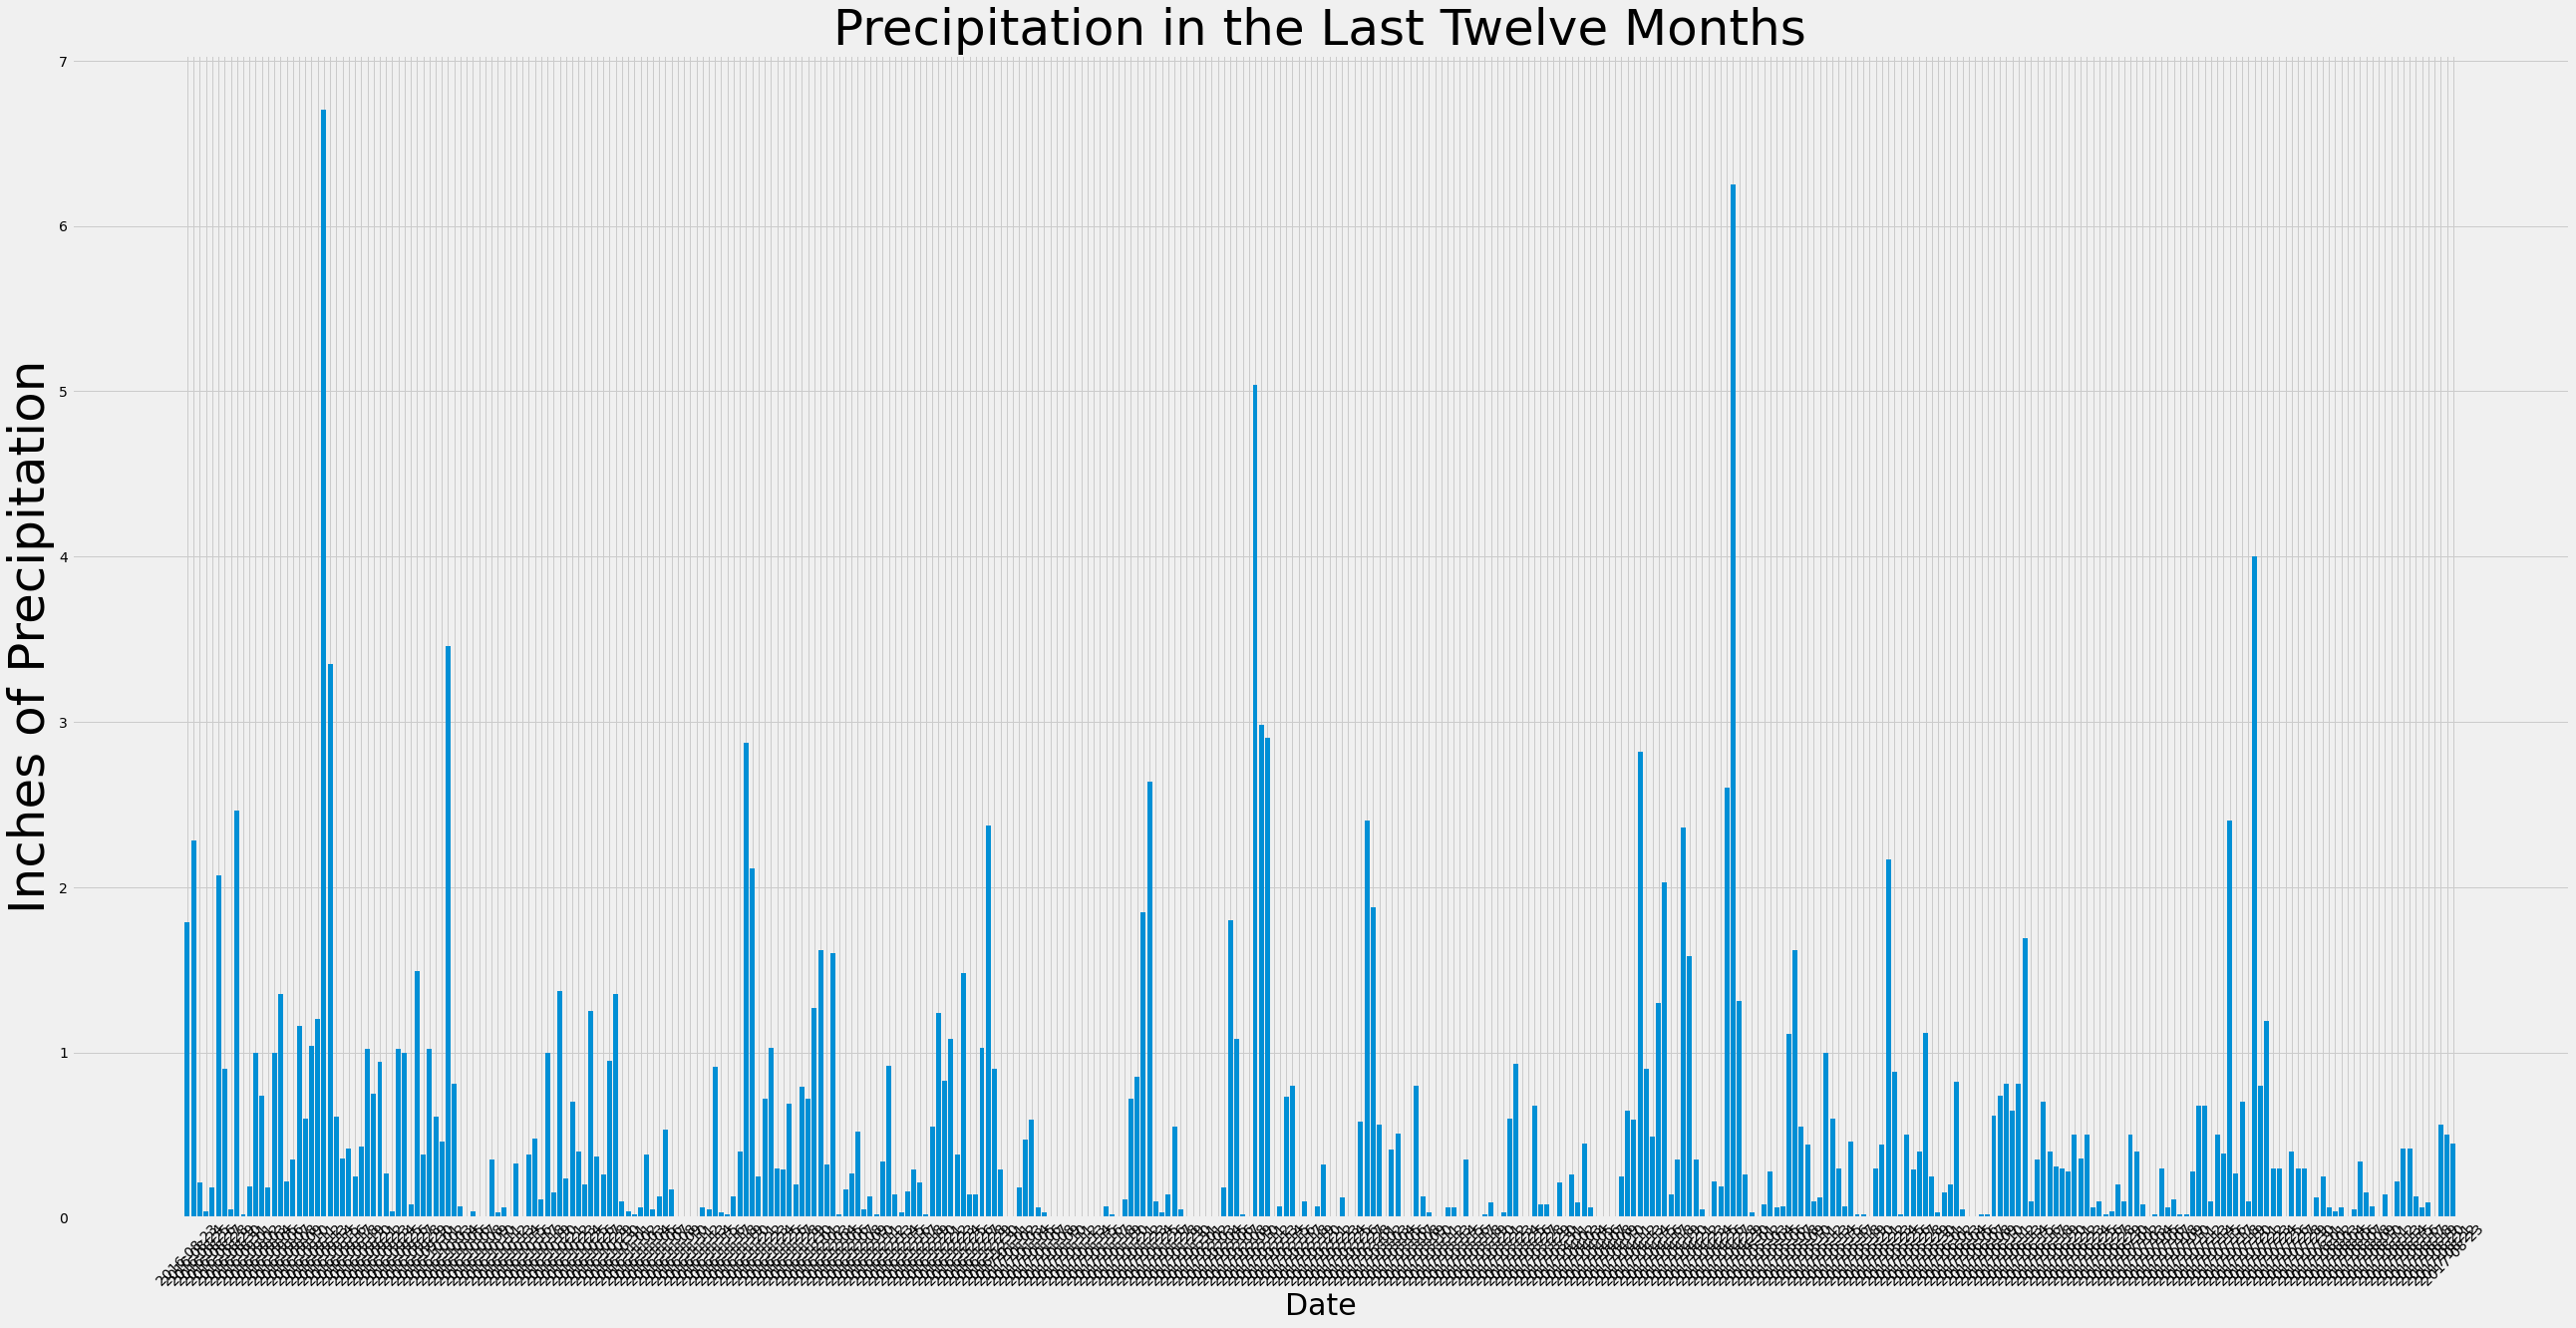

In [46]:
# Sort the dataframe by date
sorted_prcp_df = prcp_df.sort_index()
sorted_prcp_df

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize = (40,20))
plt.title("Precipitation in the Last Twelve Months", fontsize = 50)
plt.xlabel("Date", fontsize = 30)
plt.ylabel("Inches of Precipitation", fontsize = 50)
plt.xticks(rotation = 45)
plt.bar(sorted_prcp_df["date"], sorted_prcp_df["prcp"])
# plt.savefig("Output/Precipitation_Figure.png")
plt.show

In [47]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [49]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(station.id).count()
total_stations

9

In [50]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_data = session.query(measurement.station, func.count(measurement.station)).\
                      group_by(measurement.station).\
                      order_by(func.count(measurement.station).desc()).all()
active_data

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [53]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = active_data[0][0]
active_station_data = session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
                              filter(measurement.station == active_station).all()
active_station_data
print(f"Min: {active_station_data[0][0]}")
print(f"Avg: {active_station_data[0][1]}")
print(f"Max: {active_station_data[0][2]}")

Min: 54.0
Avg: 71.66378066378067
Max: 85.0


In [58]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_temp_data = session.query(measurement.station, measurement.tobs).\
                                   filter(measurement.station == active_station).\
                                   filter(measurement.date >= one_yr_difference).all()
active_station_temp_data[0:5]

InterfaceError: (sqlite3.InterfaceError) Error binding parameter 1 - probably unsupported type.
[SQL: SELECT measurement.station AS measurement_station, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE measurement.station = ? AND measurement.date >= ?]
[parameters: ('USC00519281', ('2017-08-23',))]
(Background on this error at: http://sqlalche.me/e/rvf5)

# Close session

In [ ]:
# Close Session
session.close()